In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_colwidth', None)

In [2]:
data = pd.read_csv('Dataset - NLP Assignment.csv')

In [3]:
data.head()

,ID,MEMBER_ID,REASONNPSSCORE__C
0,a2p1U000000RowfQAC,0011U00000rjFKdQAM,"I showed up for my appointment, but they had me double booked, so we didn't get to meet with the doctor for very long, and had an expedited visit. The doctor and staff were extremely friendly and apologized, and the office environment was very nice!"
1,a2p1U000000RqQqQAK,0011U00000riCSHQA2,"Staff was polite, courteous, and on time"
2,a2p1U000000RqXyQAK,0011U00000riTw7QAE,Overall care is great! It's wonderful to be able to spend 45-60 minutes with the actual Dr.
3,a2p1U000000Rq1LQAS,0011U00000rhu8eQAA,Like the doctor and staff at this location. Easy to get any appointment.
4,a2p1U000000RpiuQAC,0011U00000rk4SHQAY,The convenience and the doctors


In [4]:
# checking null values
data.isnull().sum()

ID                   0
MEMBER_ID            0
REASONNPSSCORE__C    0
dtype: int64

In [5]:
# information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3812 entries, 0 to 3811
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 3812 non-null   object
 1   MEMBER_ID          3812 non-null   object
 2   REASONNPSSCORE__C  3812 non-null   object
dtypes: object(3)
memory usage: 89.5+ KB


In [6]:
data.drop(columns=['ID','MEMBER_ID'],inplace=True)

In [7]:
data

,REASONNPSSCORE__C
0,"I showed up for my appointment, but they had me double booked, so we didn't get to meet with the doctor for very long, and had an expedited visit. The doctor and staff were extremely friendly and apologized, and the office environment was very nice!"
1,"Staff was polite, courteous, and on time"
2,Overall care is great! It's wonderful to be able to spend 45-60 minutes with the actual Dr.
3,Like the doctor and staff at this location. Easy to get any appointment.
4,The convenience and the doctors
...,...
3807,yes
3808,"Very skeptical that you will soon be without a Dr. and possibly for how long? When I call, nobody ever answers the phone!"
3809,"Doctor Malfese is easily accessible, staff is friendly and helpful. There are two locations nearby."
3810,Friendly Staff that can be reached at any time


In [8]:
data['REASONNPSSCORE__C'] = data['REASONNPSSCORE__C'].astype(str)

In [9]:
data

,REASONNPSSCORE__C
0,"I showed up for my appointment, but they had me double booked, so we didn't get to meet with the doctor for very long, and had an expedited visit. The doctor and staff were extremely friendly and apologized, and the office environment was very nice!"
1,"Staff was polite, courteous, and on time"
2,Overall care is great! It's wonderful to be able to spend 45-60 minutes with the actual Dr.
3,Like the doctor and staff at this location. Easy to get any appointment.
4,The convenience and the doctors
...,...
3807,yes
3808,"Very skeptical that you will soon be without a Dr. and possibly for how long? When I call, nobody ever answers the phone!"
3809,"Doctor Malfese is easily accessible, staff is friendly and helpful. There are two locations nearby."
3810,Friendly Staff that can be reached at any time


In [10]:
#import natural language tool kit
import nltk
import re #regular expressions module

nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#declaring porter stemmer
port = PorterStemmer()
def text_cleaner (text): #function to clean text
    cleaned= re.sub('[^a-zA-Z]', " ", text) 
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [port.stem (word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    return cleaned

In [12]:
data["Cleaned_Text"] = data["REASONNPSSCORE__C"].apply(lambda x: text_cleaner(str(x))) #declare cleaned text feature
data["Length"] = data["REASONNPSSCORE__C"].apply(lambda x:len(str(x))) #declare length feature
data.head()

,REASONNPSSCORE__C,Cleaned_Text,Length
0,"I showed up for my appointment, but they had me double booked, so we didn't get to meet with the doctor for very long, and had an expedited visit. The doctor and staff were extremely friendly and apologized, and the office environment was very nice!",show appoint doubl book get meet doctor long expedit visit doctor staff extrem friendli apolog offic environ nice,249
1,"Staff was polite, courteous, and on time",staff polit courteou time,40
2,Overall care is great! It's wonderful to be able to spend 45-60 minutes with the actual Dr.,overal care great wonder abl spend minut actual dr,92
3,Like the doctor and staff at this location. Easy to get any appointment.,like doctor staff locat easi get appoint,72
4,The convenience and the doctors,conveni doctor,31


In [13]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

In [14]:
def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'negative'
        elif x==0:
            return 'neutral'
        else:
            return 'positive'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())

In [15]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
data["Score"] = data["Cleaned_Text"].apply(lambda review:sid.polarity_scores(review))

In [17]:
data.head()

,REASONNPSSCORE__C,Cleaned_Text,Length,Score
0,"I showed up for my appointment, but they had me double booked, so we didn't get to meet with the doctor for very long, and had an expedited visit. The doctor and staff were extremely friendly and apologized, and the office environment was very nice!",show appoint doubl book get meet doctor long expedit visit doctor staff extrem friendli apolog offic environ nice,249,"{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.4215}"
1,"Staff was polite, courteous, and on time",staff polit courteou time,40,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2,Overall care is great! It's wonderful to be able to spend 45-60 minutes with the actual Dr.,overal care great wonder abl spend minut actual dr,92,"{'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compound': 0.8074}"
3,Like the doctor and staff at this location. Easy to get any appointment.,like doctor staff locat easi get appoint,72,"{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.3612}"
4,The convenience and the doctors,conveni doctor,31,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"


In [18]:
data["Compound_Score"]  = data['Score'].apply(lambda score_dict: score_dict['compound'])

In [19]:
data.head()

,REASONNPSSCORE__C,Cleaned_Text,Length,Score,Compound_Score
0,"I showed up for my appointment, but they had me double booked, so we didn't get to meet with the doctor for very long, and had an expedited visit. The doctor and staff were extremely friendly and apologized, and the office environment was very nice!",show appoint doubl book get meet doctor long expedit visit doctor staff extrem friendli apolog offic environ nice,249,"{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.4215}",0.4215
1,"Staff was polite, courteous, and on time",staff polit courteou time,40,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
2,Overall care is great! It's wonderful to be able to spend 45-60 minutes with the actual Dr.,overal care great wonder abl spend minut actual dr,92,"{'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compound': 0.8074}",0.8074
3,Like the doctor and staff at this location. Easy to get any appointment.,like doctor staff locat easi get appoint,72,"{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.3612}",0.3612
4,The convenience and the doctors,conveni doctor,31,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000


In [21]:
data["Result"] = data["Compound_Score"].apply(lambda c: 'positive' if c > 0 else ('negative' if c < 0 else 'neutral'))
data.head()

,REASONNPSSCORE__C,Cleaned_Text,Length,Score,Compound_Score,Result
0,"I showed up for my appointment, but they had me double booked, so we didn't get to meet with the doctor for very long, and had an expedited visit. The doctor and staff were extremely friendly and apologized, and the office environment was very nice!",show appoint doubl book get meet doctor long expedit visit doctor staff extrem friendli apolog offic environ nice,249,"{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.4215}",0.4215,positive
1,"Staff was polite, courteous, and on time",staff polit courteou time,40,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
2,Overall care is great! It's wonderful to be able to spend 45-60 minutes with the actual Dr.,overal care great wonder abl spend minut actual dr,92,"{'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compound': 0.8074}",0.8074,positive
3,Like the doctor and staff at this location. Easy to get any appointment.,like doctor staff locat easi get appoint,72,"{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.3612}",0.3612,positive
4,The convenience and the doctors,conveni doctor,31,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral


In [22]:
data['Result'].value_counts()

positive    2107
neutral     1419
negative     286
Name: Result, dtype: int64

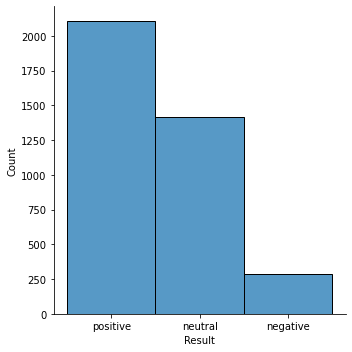

In [23]:
import seaborn as sns 
sns.displot(data['Result'])

### Feedback is very positive from most of patients

### Insights

In [34]:
df_focus = data[(data.Result == "negative")]
df_focus.head()

,REASONNPSSCORE__C,Cleaned_Text,Length,Score,Compound_Score,Result
8,I WAS IN A LOT OF DISCOMFORT YESTERDAY AND APPRECIATED THE QUICK RESPONSE,lot discomfort yesterday appreci quick respons,73,"{'neg': 0.359, 'neu': 0.641, 'pos': 0.0, 'compound': -0.4215}",-0.4215,negative
32,Handy clinic location. I liked the doctor. Hate the portal.,handi clinic locat like doctor hate portal,59,"{'neg': 0.33, 'neu': 0.446, 'pos': 0.223, 'compound': -0.296}",-0.2960,negative
66,No co-pay for office visits.,co pay offic visit,28,"{'neg': 0.318, 'neu': 0.682, 'pos': 0.0, 'compound': -0.1027}",-0.1027,negative
105,"This program was promoted as a way to see a doctor quickly and lessen the time away from work. I work in Puyallup. I was sick and requested an appointment on Thursday for vertigo, ear and sinus infection. The Dr. in Puyallup had no openings, called and wanted me to drive to Tacoma the following day at 11:30 to be seen. I went to Sound Family medicine and was treated the same day.",program promot way see doctor quickli lessen time away work work puyallup sick request appoint thursday vertigo ear sinu infect dr puyallup open call want drive tacoma follow day seen went sound famili medicin treat day,382,"{'neg': 0.082, 'neu': 0.819, 'pos': 0.099, 'compound': -0.0772}",-0.0772,negative
136,When you are sick the clinic is never open. You have to do a phone call or a video chat with them.,sick clinic never open phone call video chat,99,"{'neg': 0.32, 'neu': 0.68, 'pos': 0.0, 'compound': -0.5106}",-0.5106,negative


In [37]:
df_focus.sample(10)

,REASONNPSSCORE__C,Cleaned_Text,Length,Score,Compound_Score,Result
246,"Not enough Dr's.\r\nWas told in July it would take 5-6 weeks for apt.\r\nMy Dr their is gone. Now I need to start over. Staff rotations frequent. I need to choose a new Dr almost every year.\r\n\r\nNP's are not Dr's.\r\nDid not like speeking with NP Nathan. He spoke poorly of my past Dr there.\r\nThen said they will no longer perscribe any narcotics because their bad.\r\nWould not perscribe any medicine for my different conditions.\r\nOnly listed OTC medication to use.\r\nCould get the same advise from a Dollar Store clerk in their medication isle.\r\nRefused to perscribe narcodic pain medication even when nsaid long term use created sickness and possible damage.\r\nHard to get maintence drugs that have been on for decade such as for heart.\r\n\r\nProblems scheduling & getting told I need to reschudle the day before apt.\r\n\r\nProblems with perscriptions not called into pharmacy. \r\nNeed to call back several times asking for them to submit my perscriptions. \r\nIt takes between a business day to a week for perscriptions to be called in.\r\nSometimes not all perscribed meds get sent to pharmacy, requiring me to call back because the Dr said he was prescribing multible.\r\n\r\nTakes many calls to get refurrals sent or copy of. Stuck calling specialist, then the health clinic, then the specialist. Back and forth for more than a week before it goes thru. Insurance denied claim this year because referral was lost. Took months to fix.\r\n\r\nI get daily emails reminding me of appt and a call the day before to verify.\r\nI got 1 call to verify the appt the morning before & confermed with them.\r\nThen got a message at 5:30pm that I need to call back and conferm again for the same 8am apt. Except calling back they were closed at 5.\r\n\r\nTalking to others at work I hear the same complaints.",enough dr told juli would take week apt dr gone need start staff rotat frequent need choos new dr almost everi year np dr like speek np nathan spoke poorli past dr said longer perscrib narcot bad would perscrib medicin differ condit list otc medic use could get advis dollar store clerk medic isl refus perscrib narcod pain medic even nsaid long term use creat sick possibl damag hard get maintenc drug decad heart problem schedul get told need reschudl day apt problem perscript call pharmaci need call back sever time ask submit perscript take busi day week perscript call sometim perscrib med get sent pharmaci requir call back dr said prescrib multibl take mani call get refurr sent copi stuck call specialist health clinic specialist back forth week goe thru insur deni claim year referr lost took month fix get daili email remind appt call day verifi got call verifi appt morn conferm got messag pm need call back conferm apt except call back close talk other work hear complaint,1775,"{'neg': 0.124, 'neu': 0.841, 'pos': 0.036, 'compound': -0.9396}",-0.9396,negative
3567,"No problems, nothing outstanding on a first visit.",problem noth outstand first visit,50,"{'neg': 0.403, 'neu': 0.597, 'pos': 0.0, 'compound': -0.4019}",-0.4019,negative
1601,The doctor's approach is most welcoming. It's difficult to find a physician who takes any extra time to learn their patients instead of offering quickly determined solutions.,doctor approach welcom difficult find physician take extra time learn patient instead offer quickli determin solut,174,"{'neg': 0.143, 'neu': 0.857, 'pos': 0.0, 'compound': -0.3612}",-0.3612,negative
2230,"Misdiagnosed. The doctor said I had a viral throat infection and gave me no medicines. but in two days it was so bad that I couldn't even talk. I did call for a follow up and they said I rather go to ER. instead, I went to another doctor and they said it was Strep throat. and immediately put me on antibiotics.",misdiagnos doctor said viral throat infect gave medicin two day bad even talk call follow said rather go er instead went anoth doctor said strep throat immedi pu

## Some Negative things about clinic staff and doctor to be imporved upon
1) Hate the portal 

2) Nobody answer the calls

3) doctor should not be in hurry to see any patient

4) Very unorganized and very poor communication

5) You send appointment reminders and give the wrong address for the appointment

6) Doctor has poor follow up skills -- I always have to track him down to get my test results.

7) Too hard to get - no parking available - limited doctor availability	

8) a) feedback that is major concerns -  I'm not happy with current doctors , NP. Not taking time to listen , and then not reading my chart to know my health problems , then giving the wrong diagnosis because they didn't read my chart and history

b) Misdiagnosed. The doctor said I had a viral throat infection and gave me no medicines. but in two days it was so bad that I couldn't even talk. I did call for a follow up and they said I rather go to ER. instead, I went to another doctor and they said it was Strep throat. and immediately put me on antibiotics.

### Some positive things- 

In [38]:
df_focus_pos = data[(data.Result == "positive")]
df_focus_pos.head()

,REASONNPSSCORE__C,Cleaned_Text,Length,Score,Compound_Score,Result
0,"I showed up for my appointment, but they had me double booked, so we didn't get to meet with the doctor for very long, and had an expedited visit. The doctor and staff were extremely friendly and apologized, and the office environment was very nice!",show appoint doubl book get meet doctor long expedit visit doctor staff extrem friendli apolog offic environ nice,249,"{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.4215}",0.4215,positive
2,Overall care is great! It's wonderful to be able to spend 45-60 minutes with the actual Dr.,overal care great wonder abl spend minut actual dr,92,"{'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compound': 0.8074}",0.8074,positive
3,Like the doctor and staff at this location. Easy to get any appointment.,like doctor staff locat easi get appoint,72,"{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.3612}",0.3612,positive
5,They are very good about returning calls,good return call,40,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}",0.4404,positive
6,I like the convenience of the location to my work and I like one provider who will keep track of all of my other providers etc. I was sick and they were able to help me and had the PX right there so I didn't have to go to another place to fill my prescription.,like conveni locat work like one provid keep track provid etc sick abl help px right go anoth place fill prescript,261,"{'neg': 0.118, 'neu': 0.607, 'pos': 0.275, 'compound': 0.5267}",0.5267,positive


## positive that should be continued
1) Easy to get any appointment

2) Like the doctor and staff at this location

3) They are very good about returning calls

4) The doctor and staff were extremely friendly and apologized, and the office environment was very nice!